In [1]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz #This will be necessary for integrating the area under the curve of the Levenspiel plot
%matplotlib inline

In [2]:
#Enter original data from the problem (Fogler)
X = [0.0, 0.2, 0.4, 0.6, 0.65]
Y = [1.28, 0.94, 0.85, 1.32, 2.0] #Fa0/-rA (processed data)

(0.0, 2.2)

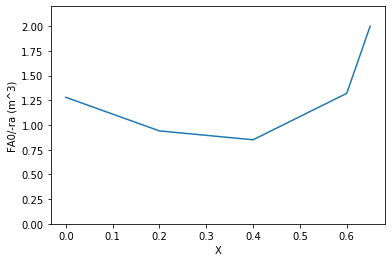

In [4]:
#Plot the original data
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("FA0/-ra (m^3)")
plt.ylim([0.0, 2.2])

Since there is downward curvature in the first part of the plot, we will use a CSTR for that, then switch to a PFR at the minimum. The volume of the CSTR is easy to calculate. Just multiply X by Fa0/-rA

In [5]:
Y_CSTR = min(Y) #Find the minimum value 
ind = Y.index(Y_CSTR) #Find where this value was in the list
X_CSTR = X[ind] #Grab the corresponding data point in X

V_CSTR = X_CSTR*Y_CSTR #m^3
print("CSTR Volume is ", V_CSTR, "m^3")

CSTR Volume is  0.34 m^3


The PFR is a little more tricky, as we have to numerically integrate the area under the curve for the part between X=0.4-0.65

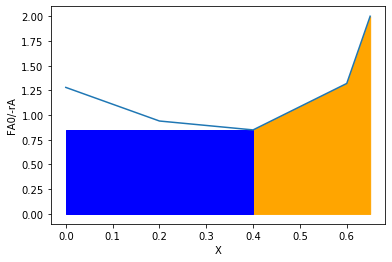

In [6]:
X_trunc = X[ind:] #Only take the points past element #2
Y_trunc = Y[ind:]
plt.plot(X,Y)
plt.fill_between(X_trunc,Y_trunc,color='orange') #PFR volume in orange
plt.fill_between([X[0],X_CSTR],[Y_CSTR,Y_CSTR],color='blue') #CSTR volume in blue
plt.xlabel('X')
plt.ylabel('FA0/-rA')
plt.show()
#plt.legend()

In [7]:
#Integrate the area under the curve for the PFR 
V_PFR = trapz(Y_trunc,X_trunc)
print("PFR volume is", V_PFR, " m^3" )

PFR volume is 0.30000000000000004  m^3


In [8]:
print("Total volume of both reactors is", V_CSTR+V_PFR, " m^3")

Total volume of both reactors is 0.6400000000000001  m^3
